In [5]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import warnings

warnings.filterwarnings('ignore')

In [6]:
%config Completer.use_jedi = False

# Load Data

In [12]:
data_train = '../../../data/hackaton/dataset_hackaton/Training'
data_test = '../../../data/hackaton/dataset_hackaton/Test'

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(data_train,
                                                 target_size = (64, 64),
                                                 batch_size = 50,
                                                 class_mode = 'binary')

Found 7041 images belonging to 9 classes.


In [16]:
test_set = test_datagen.flow_from_directory(data_test,
                                            target_size = (64, 64),
                                            batch_size = 50,
                                            class_mode = 'binary')

Found 3741 images belonging to 9 classes.


# VGG16

In [32]:
def VGG16():

    model = Sequential()

    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding=”same”, activation=”relu”))

    model.add(Conv2D(filters=64,kernel_size=(3,3),padding=”same”, activation=”relu”))

    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same”, activation=”relu”))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding=”same”, activation=”relu”))

    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding=”same”, activation=”relu”))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding=”same”, activation=”relu”))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding=”same”, activation=”relu”))

    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding=”same”, activation=”relu”))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding=”same”, activation=”relu”))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding=”same”, activation=”relu”))

    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding=”same”, activation=”relu”))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding=”same”, activation=”relu”))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding=”same”, activation=”relu”))

    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name=’vgg16'))

    model.add(Flatten(name=’flatten’))

    model.add(Dense(256, activation=’relu’, name=’fc1'))

    model.add(Dense(128, activation=’relu’, name=’fc2'))

    model.add(Dense(9, activation=’softmax’, name=’output’))
                    
    return model

SyntaxError: invalid character in identifier (<ipython-input-32-f5764ccded83>, line 5)

In [ ]:
model=VGG16()

model.summary()

Vgg16 = Model(inputs=model.input, outputs=model.get_layer(‘vgg16’).output)

# Compilation Step

In [19]:
classifier.compile(optimizer='Adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Network summary

In [20]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [28]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [29]:
history = classifier.fit_generator(training_set, steps_per_epoch=320,validation_data=test_set, validation_steps=90, epochs=5, verbose=1)


Epoch 1/5
320/320 [==============================] - 39s 122ms/step - loss: -4702619.6321 - accuracy: 0.1121 - val_loss: -25032922.0000 - val_accuracy: 0.1053
Epoch 2/5
320/320 [==============================] - 35s 111ms/step - loss: -79116372.8342 - accuracy: 0.1128 - val_loss: -147180944.0000 - val_accuracy: 0.1053
Epoch 3/5
320/320 [==============================] - 37s 114ms/step - loss: -346712808.2830 - accuracy: 0.1128 - val_loss: -540576000.0000 - val_accuracy: 0.1060
Epoch 4/5
320/320 [==============================] - 35s 110ms/step - loss: -896389823.0276 - accuracy: 0.1121 - val_loss: -1328658816.0000 - val_accuracy: 0.1040
Epoch 5/5
320/320 [==============================] - 36s 111ms/step - loss: -1800142353.4831 - accuracy: 0.1118 - val_loss: -2374976000.0000 - val_accuracy: 0.1046


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


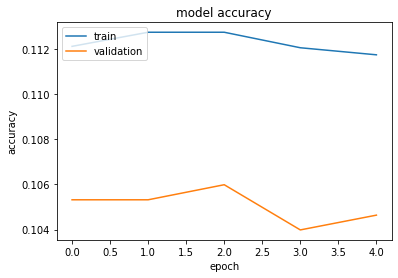

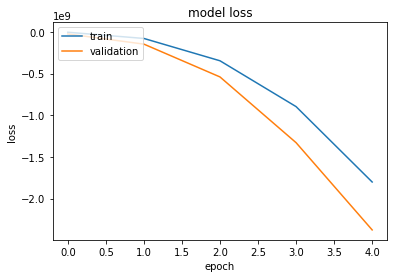

In [31]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()